## En esta clase veremos los metodos para el tratamiento de outliers o valores atipicos

In [1]:
import pandas as pd

data = pd.read_excel('outliers.xlsx')

data.head()

,ID_Cliente,Edad,Saldo_Cuenta,Num_Transacciones,Score_Credito,Monto_Prestamo,Dias_Ultimo_Pago,Inversiones,Num_Productos,Riesgo_Inversion
0,1,62,69875.210793,90,828,39657.144381,24,106166.572431,7,0.126290
1,2,65,53079.988457,93,314,31143.595465,10,147576.119681,5,0.108898
2,3,18,50677.010231,119,310,36545.968189,33,92111.402846,9,0.975768
3,4,21,85094.372090,114,432,17888.951027,17,103205.311414,5,0.806648
4,5,21,45853.507325,97,808,11552.472339,19,126658.827788,6,0.811537


In [2]:
data.shape

(2000, 10)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Cliente         2000 non-null   int64  
 1   Edad               2000 non-null   int64  
 2   Saldo_Cuenta       2000 non-null   float64
 3   Num_Transacciones  2000 non-null   int64  
 4   Score_Credito      2000 non-null   int64  
 5   Monto_Prestamo     2000 non-null   float64
 6   Dias_Ultimo_Pago   2000 non-null   int64  
 7   Inversiones        2000 non-null   float64
 8   Num_Productos      2000 non-null   int64  
 9   Riesgo_Inversion   2000 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 156.4 KB


In [4]:
data.describe()

,ID_Cliente,Edad,Saldo_Cuenta,Num_Transacciones,Score_Credito,Monto_Prestamo,Dias_Ultimo_Pago,Inversiones,Num_Productos,Riesgo_Inversion
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,1000.500000,43.449500,60635.063089,99.76200,569.635000,32396.028737,29.723500,1.163966e+05,4.960500,0.496365
std,577.494589,15.054626,72675.901131,10.07115,159.728524,22324.252797,17.051171,1.200571e+05,2.572596,0.288222
min,1.000000,18.000000,3247.151126,68.00000,300.000000,10008.277939,0.000000,-1.471821e+04,1.000000,0.000803
25%,500.750000,31.000000,40195.909097,93.00000,427.000000,19896.264431,15.000000,7.846829e+04,3.000000,0.245538
50%,1000.500000,43.000000,50443.753139,100.00000,570.000000,29943.832540,30.000000,9.958701e+04,5.000000,0.498170
75%,1500.250000,56.000000,60533.508766,106.00000,708.000000,40299.683666,44.000000,1.214181e+05,7.000000,0.741723
max,2000.000000,69.000000,794184.048405,138.00000,849.000000,242444.709658,59.000000,1.450915e+06,9.000000,0.999968


In [5]:
data.isnull().sum()

ID_Cliente           0
Edad                 0
Saldo_Cuenta         0
Num_Transacciones    0
Score_Credito        0
Monto_Prestamo       0
Dias_Ultimo_Pago     0
Inversiones          0
Num_Productos        0
Riesgo_Inversion     0
dtype: int64

In [6]:
data.dtypes

ID_Cliente             int64
Edad                   int64
Saldo_Cuenta         float64
Num_Transacciones      int64
Score_Credito          int64
Monto_Prestamo       float64
Dias_Ultimo_Pago       int64
Inversiones          float64
Num_Productos          int64
Riesgo_Inversion     float64
dtype: object

### Tratamiento de Outliers

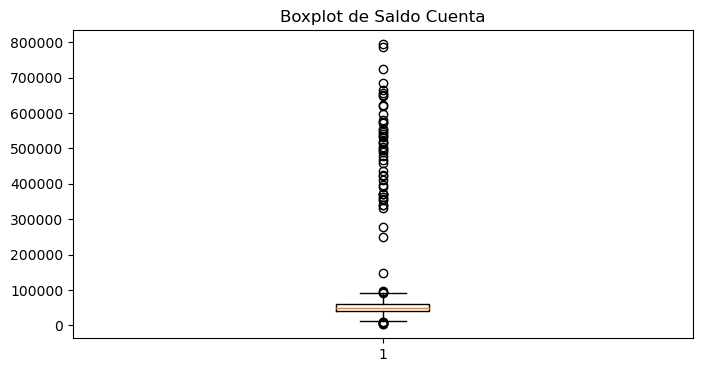

In [7]:
# Con un boxplot podemos visualizar los valores atipicos y outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.boxplot(data['Saldo_Cuenta']) 
plt.title('Boxplot de Saldo Cuenta')
plt.show()

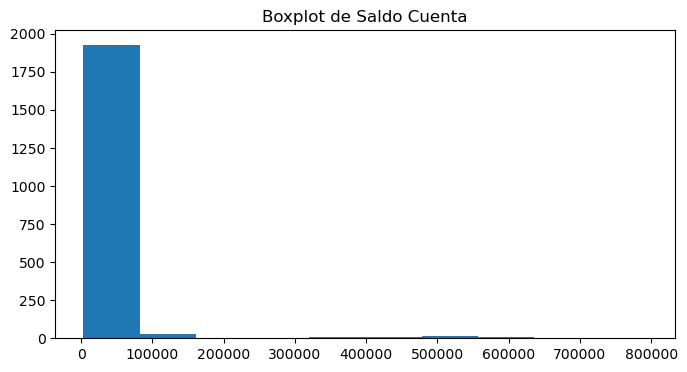

In [8]:
# podemos verificar outliers mediante un histograma
plt.figure(figsize=(8,4))
plt.hist(data['Saldo_Cuenta'])
plt.title('Boxplot de Saldo Cuenta')
plt.show()

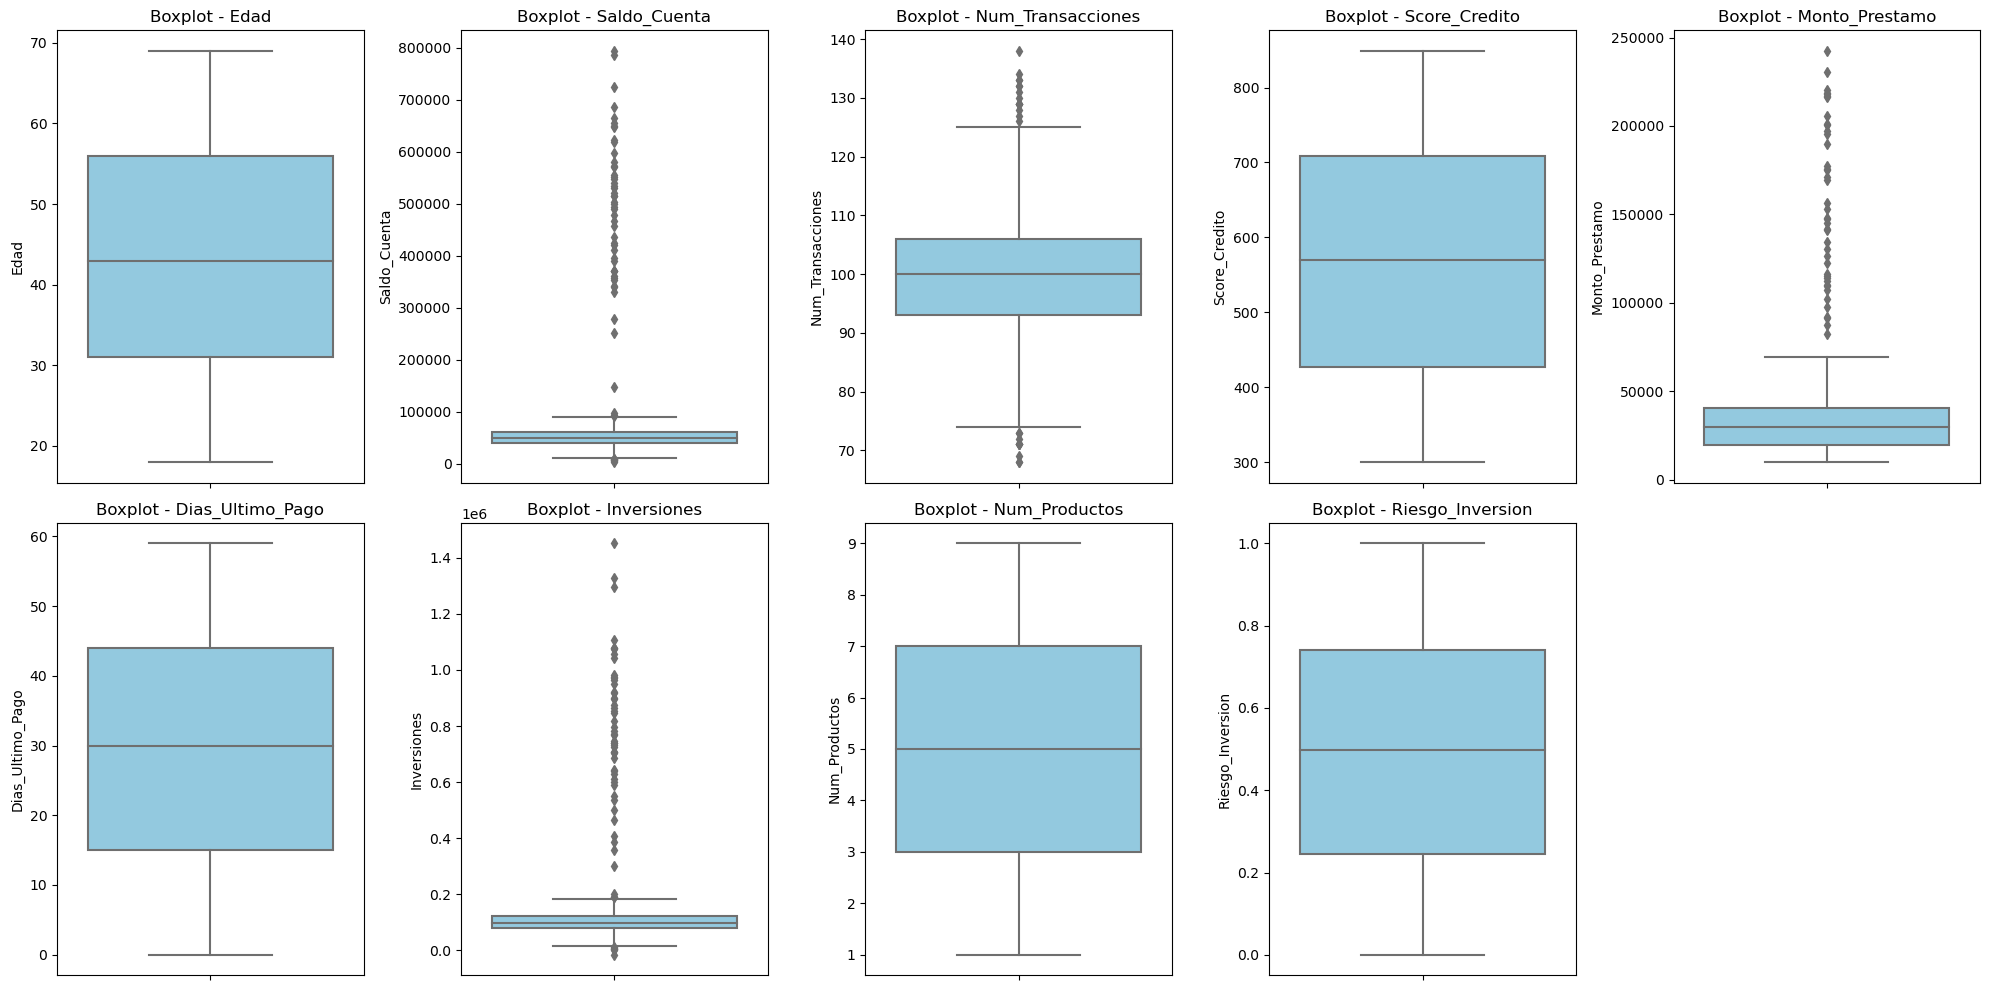

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = data.drop('ID_Cliente', axis=1)  # Quitamos la columna ID si no quieres graficarla

num_vars = df.shape[1]  # Cantidad de variables numéricas
cols = 5                # Cantidad de columnas del grid
rows = math.ceil(num_vars / cols)  # Calculamos las filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

# Flatten los ejes por si es más de una fila
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot - {col}', fontsize=12)
    axes[i].set_xlabel('')  # Opcional para no saturar el gráfico

# Elimina ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


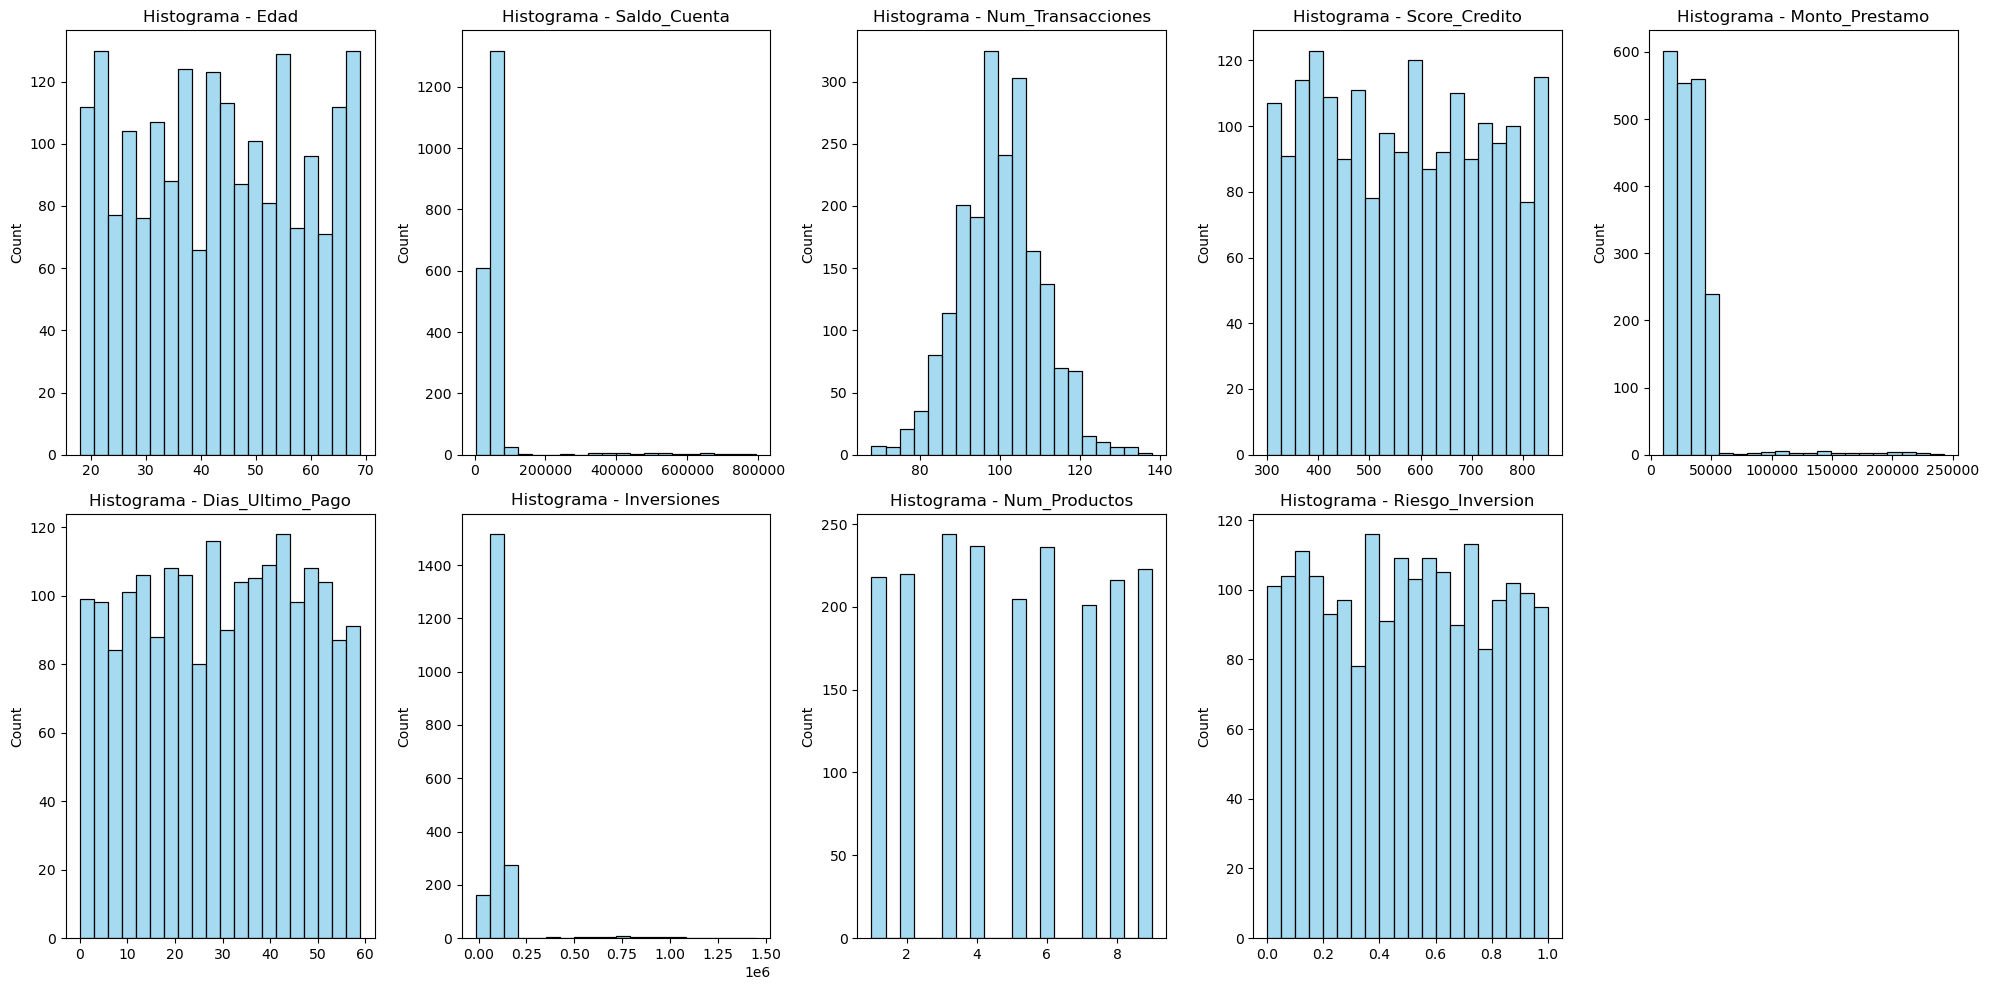

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_vars = df.shape[1]  # Cantidad de variables numéricas
cols = 5                # Cantidad de columnas del grid
rows = math.ceil(num_vars / cols)  # Calculamos las filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=False, color='skyblue', bins=20)
    axes[i].set_title(f'Histograma - {col}', fontsize=12)
    axes[i].set_xlabel('')  # Opcional para que no se vea saturado

# Elimina ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
# Eliminar los outliers mediante el metodo de recorrido intercuartil

# Primero definimos los cuartiles
Q1 = data['Saldo_Cuenta'].quantile(0.25) # 1er cuartil 25%
Q3 = data['Saldo_Cuenta'].quantile(0.75) # 3er cuartil 75%
IQR = Q3 - Q1

# Luego definimos los limites mediante la 'regla de Tukey'
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los datos para excluir outliers
data = data[(data['Saldo_Cuenta'] >= limite_inferior) & (data['Saldo_Cuenta'] <= limite_superior)]

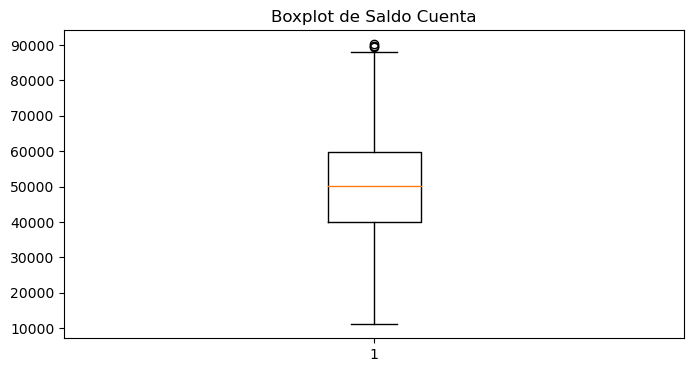

In [13]:
plt.figure(figsize=(8,4))
plt.boxplot(data['Saldo_Cuenta']) 
plt.title('Boxplot de Saldo Cuenta')
plt.show()

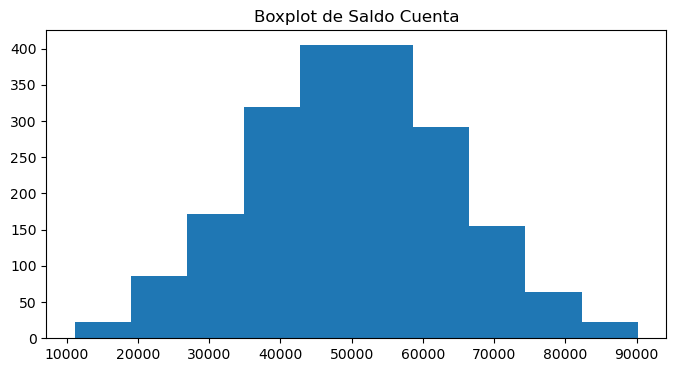

In [14]:
# podemos verificar outliers mediante un histograma
plt.figure(figsize=(8,4))
plt.hist(data['Saldo_Cuenta'])
plt.title('Boxplot de Saldo Cuenta')
plt.show()

In [15]:
data1 = data.copy()
from scipy import stats

# Eliminar outliers mediante la desviacion estandar
# Calcular el Z-score para cada dato de la columna 'Saldo_Cuenta'
data1['Saldo_Cuenta_Z_Score'] = stats.zscore(data1['Saldo_Cuenta'])

# Filtrar datos con un Z-score menor a 3
data1_outliers = data1[(data1['Saldo_Cuenta_Z_Score'] > -3) & (data1['Saldo_Cuenta_Z_Score'] < 3)]


In [16]:
# Eliminar outliers mediante el truncamiento o winsoracion
data2 = data.copy()
from scipy.stats.mstats import winsorize

# Winsorizar la columna 'Saldo_Cuenta' al 5% en ambos extremos
data2['Saldo_Cuenta_Winsorized'] = winsorize(data2['Saldo_Cuenta'], limits=[0.05, 0.05])


In [17]:
# Reemplazar outliers por la mediana
data3 = data.copy()

# Identificar outliers
outliers = (data3['Saldo_Cuenta'] < limite_inferior) | (data3['Saldo_Cuenta'] > limite_superior)

# Reemplazar outliers por la mediana
data3.loc[outliers, 'Saldo_Cuenta'] = data3['Saldo_Cuenta'].median()


In [18]:
data4 = data.copy()
# Considerar como outlier extremo aquellos valores fuera de 3 veces el IQR
extreme_limite_inferior = Q1 - 3 * IQR
extreme_limite_superior = Q3 + 3 * IQR

# Eliminar los outliers extremos
iqr3 = data3[(data3['Saldo_Cuenta'] >= extreme_limite_inferior) & (data3['Saldo_Cuenta'] <= extreme_limite_superior)]